In [1]:
import tensorflow as tf
import tensorflow.keras

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.9):
            self.model.stop_training=True

In [3]:
callbacks = myCallback()
model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256,activation='relu'),
              tf.keras.layers.Dense(128,activation='relu'),
              tf.keras.layers.Dense(64,activation='relu'),
              tf.keras.layers.Dropout(0.4),
              tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                   './data/train',
                   target_size=(150,150),
                   batch_size=128,
                   class_mode='binary'
     )


Found 14000 images belonging to 2 classes.


In [5]:
history = model.fit_generator(train_generator,epochs=20,steps_per_epoch=54,verbose=1,callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
54/54 [==============================] - 150s 3s/step - loss: 0.6739 - accuracy: 0.5900
Epoch 2/20
54/54 [==============================] - 149s 3s/step - loss: 0.5921 - accuracy: 0.6885
Epoch 3/20
54/54 [==============================] - 127s 2s/step - loss: 0.5497 - accuracy: 0.7181
Epoch 4/20
54/54 [==============================] - 128s 2s/step - loss: 0.5288 - accuracy: 0.7354
Epoch 5/20
54/54 [==============================] - 127s 2s/step - loss: 0.4887 - accuracy: 0.7586
Epoch 6/20
54/54 [==============================] - 128s 2s/step - loss: 0.4727 - accuracy: 0.7773
Epoch 7/20
54/54 [==============================] - 130s 2s/step - loss: 0.4394 - accuracy: 0.7888
Epoch 8/20
54/54 [==============================] - 134s 2s/step - loss: 0.4269 - accuracy: 0.8030
Epoch 9/20
54/54 [==============================] - 125s 2s/step - loss: 0.3656 - accuracy: 0.8302
Epoch 10/20
54/54 [==============

In [6]:
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


[0.]
./female_000027.jpg is a female


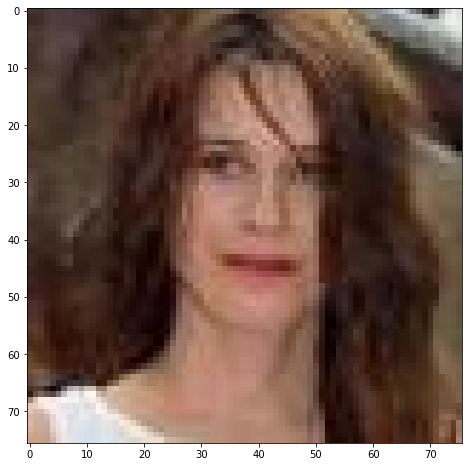

In [23]:
path ='./female_000027.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
from PIL import Image
import matplotlib.pyplot as plt
#img = Image.open(path,target_size=(150,150))
#img = np.array(img)
classes = model.predict(images)#,batch_size=10)
print(classes[0])
if classes[0]<0.5:
    print(path + " is a female")
else:
    print(path + " is a male")
from PIL import Image
import matplotlib.pyplot as plt
imag = Image.open(path)
imag = np.array(imag)
plt.figure(figsize=(8,8))
plt.imshow(imag)